# **Customer Analytics with Python.** 

## **A brief marketing introduction.** 

### **Segmentation, targeting, positioning. (STP Framework)**

#### KYC : Know your customer.

#### B2C business model : the clients are individual people rather than institutions or firms. 

#### The data came from a Fast-moving consumer goods company (FMCG company) like a supermarket. 

### a) _Segmentation_: 

#### Dividing a population into groups with similar characteristics. This groups hace comparable purchase behaviors. This segments will response similarly to different marketing activities. 

#### Different segments may respond differently to marketing activities. 

#### Marketers rely on demographic and geographic data. 

#### Marketers rely sometimes in Psychographic and Behavioral data, this states that some customers are more impulsive and others are more controlled when buying.  

#### **Behavioral data**  is preferred because it provides historic data like purchase frequency, how often customer buy, at what time they buy, what quantities they buy, product ratings. 

### b) _Targeting_: 


#### Evaluating potential profits from segments and deciding which segments to focus on. 

#### We can decide to offer products to some segments. 

#### There are some factors in consideration like segment size, expected growth, competitorps offerings. 

#### Here we decide the different ways to promote our products. We can taget one segment on the TV and one online. 

#### Targeting is 'advertising' territory, it envolves psycology and behavioral understanding of the customers. 


### c) _Positioning_: 
 
#### In this step we answer the question, What product would have the closest characteristics to customer's needs. It also contemplates how we should present the product to the customer and by what channels. 

#### It consist on implementing the targeting actions for the product. 

#### It has a framework called Marketing Mix. 

### _Marketing Mix_

#### Develop the best product and offer it at the right price through the right channels. 

### _3 important questions in customer analytics refering to marketing mix_

####  Will a customer buy a product from a particular product category when they enter the shop. 

#### Which brand is the customer going to choose. 

#### How many units is the customer going to purchase. 

### In marketing mix we have 4 groups of variables: 

* Product characteristics.
* Price of offering. 
* Promotions.
* Place or channel of offering.

### _This are the 4 p's of marketing_. 

#### Product: features of it: color, desing, branding, packaging. 

#### Price: How much the product cust, long-term price change, discounts

#### Promotion : How the product is being communicated or advertised. 

#### Sales promotions : Price reduction , display (where the products are placed in a store) and feature (like James bond cars). 

#### Place :  Where the product will be offered or distributed. It can be made by 3 different ways. 

#### Intensive distribution: Many different stores around the world.

#### Selective distribution: Where are the best places to sell the product. 

#### Exclusice distribution: Luxury items or high status image. 


### **Physical vs Online stores**.

#### In this notebook there are 4 relevant questions:

#### 1) KYC (Know your customer) Who are the customers and what customer  segments are there? 

#### 2) Will a customer buy a product for a particular category when they enter the store? (purchase probability)

#### 3) Which brand is the customer going to choose? (brand choice probability)

#### 4) How many units is the customer going to purchase? (purchase quantity)


### **Price Elasticity**

#### Price elasticity measures how purchasing behavior changes when the price changes. 

#### Cross-price elasticity: how the purchase behavior change when taking into account the competition. Will the customers change to the competition product if the price of my product is higher?  In the example of coca-cola and pepsi it is called 'Price elasticity of Coca-Cola demand with respect to the price of Pepsi'. 

#### Price elasticity is related with what is called supply and demand.

#### The cheaper the product - the higher the demand and vice versa.

#### There is an sweet spot where we achieve and optimal revenue. Revenue is calculated as price x Units sold. 

#### In economic terms, Price elasticity (E) is calculated as: 

#### $E$ = %change in economic outcome of interest (number of units sold)  (Y)/ 1% change price. (P)

#### $E$ = $\frac{Y}{P}$ = $Y_{t}-Y_{t-1}/Y_{t-1}$ / $P_{t}-P_{t-1}/P_{t-1}$

#### We will look at price elasticity of purchase probability, brand choice probability and purchase quantity. 

#### Price elasticity of purchase probability: The greater the price the lower the customer will buy. If we have several beers and we calculate and aggregate price for beers, if the aggregate price goes up, the price elasticity will show s how much would the purchasing quantity decrease. 

#### Price elasticity for brand choice: IF the price of a certain brand increases the brand choice probability decreases. When computing the price elasticity it will tell us How much the brand choice probability of our brand would increase with a one percent increase in the price of a competing brand. 

#### Price elasticity for purchase quantity: the higher the price the less products the customer will buy. 



# **1) Customer Segmentation.**

### **Dataset**:

#### Data from 2000 individuals for a given area. It is a sample that represents the whole country. 

#### They enter and FMCG store, and the data has been recollected using a loyalty card. 

#### **Dataset variables**. 

| Variable        | Type         | Range     | Description                                                                                                                                                       |
|-----------------|--------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID              | numerical    | Integer   | Unique identifier of a customer                                                                                                                                   |
| Sex             | categorical  | {0,1}     | Sex of a customer.<br>0-Male <br>1-Female                                                                                                                         |
| Marital status  | categorical  | {0,1}     | Marital status of a customer.<br>0-Single <br>1-non-single(divorced/separated/married/widowed)                                                                    |
| Age             | numerical    | Integer   | Age of a customer.                                                                                                                                                |
| Education       | categorical  | {0,1,2,3} | Level of education of a customer. <br>0-other/unknown<br>1-high school <br>2-university<br>3-graduate school                                                      |
| Income          | numerical    | Real      | Self-reported annual income in US dollars of the customer.                                                                                                        |
| Occupation      | categorical  | {0,1,2}   | Category of occupation of the customer. <br>0-unemployed/unskilled<br>1-skilled employee/official<br>2-management/self-employed/highly qualified employee/officer |
| Settlement size | categorical  | {0,1,2}   | The size of the city that the customer lives in. <br>0-small city <br>1-mid-sized city <br>2-big city                                                             |

## **Exploratory data analysis**.

### **Libraries**

In [1]:
import scipy 
import pickle
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram,linkage

sns.set()

In [2]:
df_segmentation = pd.read_csv("segmentation data.csv",index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.size

14000

In [5]:
df_segmentation.shape

(2000, 7)

In [6]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### **Correlation Estimate**. 

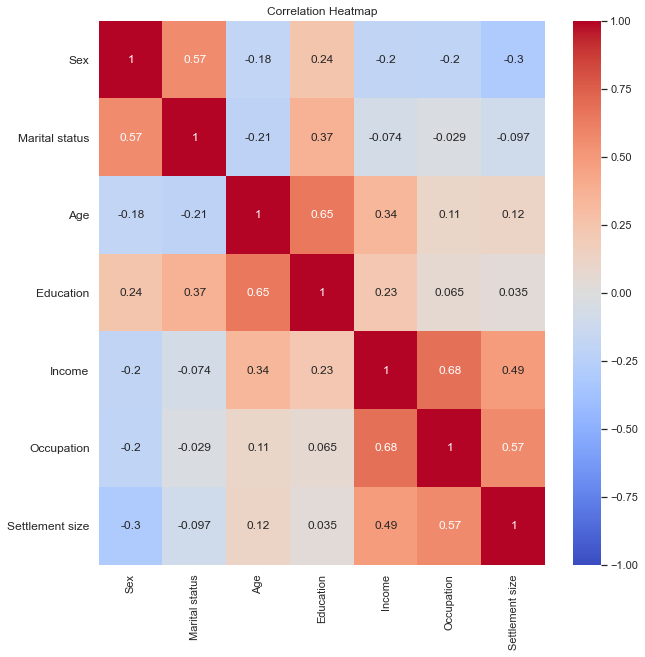

In [7]:
plt.figure(figsize=(10,10))
s = sns.heatmap(df_segmentation.corr(), vmin=-1, cmap = "coolwarm",annot=True)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df_segmentation.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

### **Visualizing raw data**

Text(0.5, 1.0, 'Visualization of raw data Income vs Age')

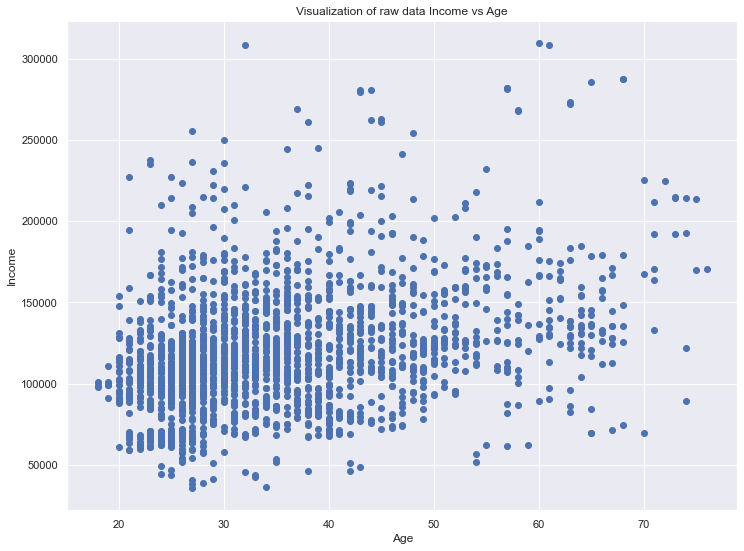

In [9]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data Income vs Age')

### **Data Standardization**. 

In [10]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [11]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## **1.1) Hierarchical Clustering.**

### There are two types of Hierarchical clustering. 

* Divisive (Top Down)
* Agglomerative (Bottom up)

### Divisive: at the begining all observations are in the same cluster like the animal kingdom.

### Agglomerative: the level of glanurality of the clusters is higher, there are a lot of different groups at the beginning and then we start to grouping them to form bigger clusters each time. It is easier mathematically. 
  
### How do we measure the distances between observations?

### We need to calculate also the distance between clusters. For segmentation we have the ward method.


### The ward method calculates the square of the distances between clusters.



### **Hierarchical clustering implementation using dendrogram**.

### A dendogram is a tree-like, hierarchical representation of points.

### linkage states the specific method we employed. 

In [12]:
hier_clust = linkage(segmentation_std,method='ward')

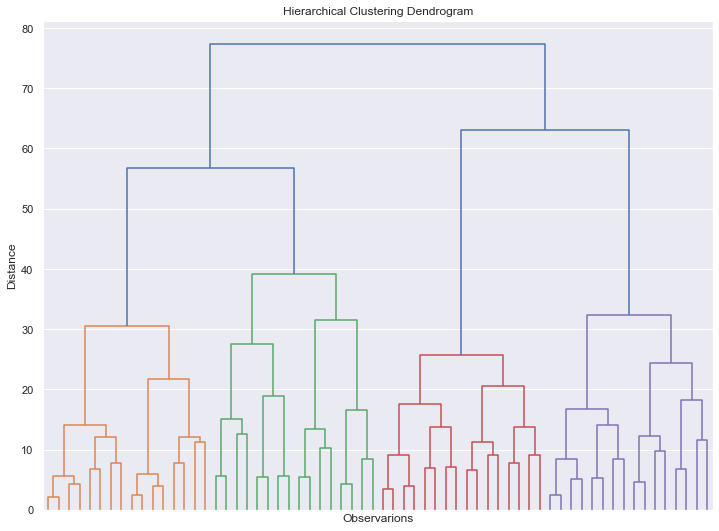

In [13]:
plt.figure(figsize =(12,9))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observarions')
plt.ylabel('Distance')

dendrogram(hier_clust,
           truncate_mode= 'level',
           p =5,
           show_leaf_counts = False,
           no_labels = True
          )

plt.show()


### Distances between points are represented by the vertical lines. The smaller the distance between points, the further down in the tree they will be group together. A join between to clusters is represented by a horizontal line. 

### Here we have 4 clusters for our data. 

## **1.2) K-Means clustering.**


#### 1) How many clusters we will like to have. (K)

#### 2) Specify the cluster seed or centroid. 

#### 3) Assign each point to a seed based on proximity (euclidean squared distance : sensitive to outliers). 

#### 4) Calculate the centroid or the geometrical center. 

#### 5) Repeat the previous steps.


### K-means enforces spherical clusters. 

### K-means doesn´t tells us how many clusters they are. Instead it minimizes the euclidean norm. 

### We can assume there are two clusters at the beggining and then calculate the sum of squared distances within each clusters. Then with 3 clusters and compared the two results. 

### WCSS : within cluster sum of squares, it is the sum of the variance between the observations in each clusters. 




In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

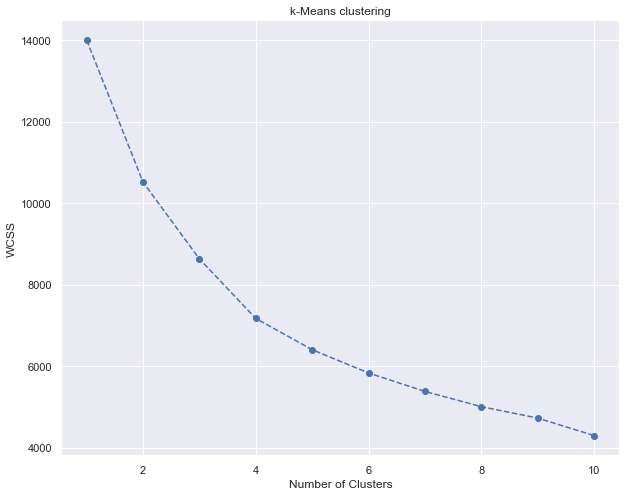

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Based on the elbow method we have 4 clusters. 

In [16]:
kmeans = KMeans(n_clusters=4 ,init = 'k-means++', random_state=42)

In [17]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [18]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [19]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


### Segment 0:  it is composed by men ar women almost equally, with an average age of 56, this is the oldest segment. They have the highest level of education and income and 2/3 are in a relationship. 

In [20]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [21]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [22]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [23]:
df_segm_analysis.rename({0:'well-of',
                         1:'fewer opportunities',
                         2:'standard segment',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-of,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard segment,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [24]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-of',
                                                                1:'fewer opportunities',
                                                                2:'standard segment',
                                                                3:'career focused'})

In [25]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-of
100000002,1,1,22,1,150773,1,2,2,standard segment
100000003,0,0,49,1,89210,0,0,1,fewer opportunities
100000004,0,0,45,1,171565,1,1,3,career focused
100000005,0,0,53,1,149031,1,1,3,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer opportunities
100001997,1,1,27,1,117744,1,0,2,standard segment
100001998,0,0,31,0,86400,0,0,1,fewer opportunities


C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


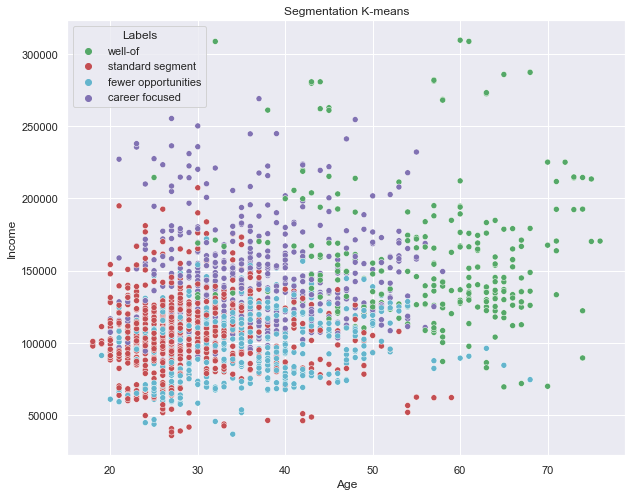

In [26]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette = ['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

### It is not a good result, so we can implement principal component analysis to get a better one. 

## **1.3) Dimensionality reduction**

### How it works?

### Lets supose we have a dataset with 3 variables. So a point i can be denoted as a vector [Xi,Yi,Zi].

### In some cases we can find a place close to the data, which axes can be denoted as u and v. Not all points lay on this plane but it is an approximation. 

### We end up converting our 3D data into 2D data, some information is lost but the total number of features is reduced. 

### **1.3.1) PCA**

In [27]:
pca = PCA()

In [28]:
pca.fit(segmentation_std)

PCA()

### PCA creates as many components as features we have in our data. The components are arrenged in order of importance. 

### Importance means  how much of the variance of the data is explained by each component. 

In [29]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

### All this components sum up to 1. 

### The task now is to find a subset of components, while preserving variance.  

Text(0, 0.5, ' Cummulative Explained variance')

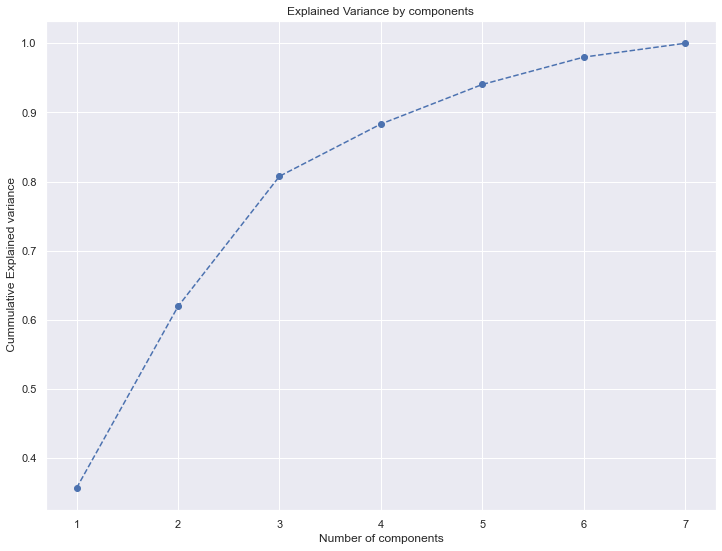

In [30]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel(' Cummulative Explained variance')

### We will choose the first 3 components. 

In [31]:
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [32]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

#### This values are called loadings, loadings are the correlation between an original variable and a component. 

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns= df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2','Component 3'])

In [34]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x212d8f3fd30>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

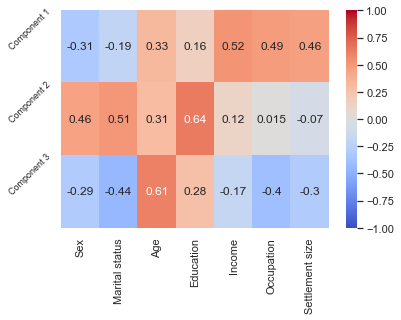

In [35]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

plt.yticks([0,1,2],
           ['Component 1','Component 2', 'Component 3'],
           rotation = 45, fontsize = 9 )

### There is a positive correlation between component 1 and Age, Education, Income, Occupation and Settlement size.  This component is related with the carrer focus of an individual. 

### The second component is more related to the individual, lifestyle and principal demographic information. 

### Regarding the third component, marital status, age and occupation are the most important features. Marital status and occupation load negatively. We determine the importance of the individual loadings with respect their individual values. This component indicates the experience a person have, it doesn't matter if it is life experience or workexperience. 

### We now transform our data using only the 3 components. The pca scores. 

In [36]:
scores_pca = pca.transform(segmentation_std)

### The pca scores are standarized by definition so we do not need to standarize them. 

## **1.4) K-means clustering with PCA.**

In [37]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

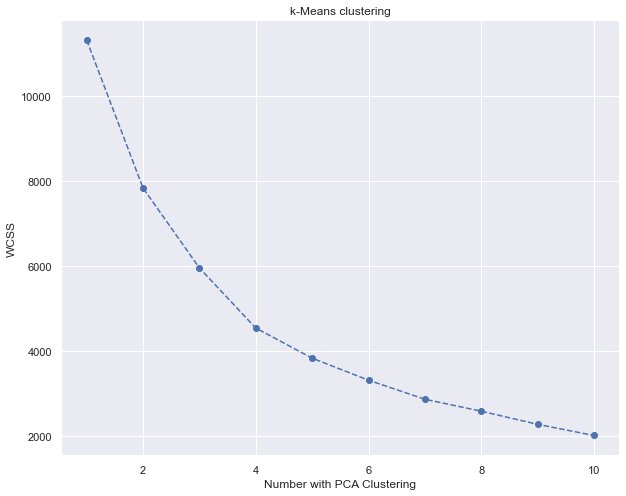

In [38]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number with PCA Clustering')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans_pca = KMeans(n_clusters=4 ,init = 'k-means++', random_state=42)

In [40]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [41]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)


In [42]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [43]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [44]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [45]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


#### The first component is related to career, the second to education and lifestule and the third one to experience (work and life)

In [46]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',1:'career focused',2:'fewer opportunities',3:'well-off'})

In [47]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


### We can  plot the data using the first two components in a 2D plane because they are the ones that explain the higher variability of the data. 

In [48]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',1:'career focused',2:'fewer opportunities',3:'well-off'})

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


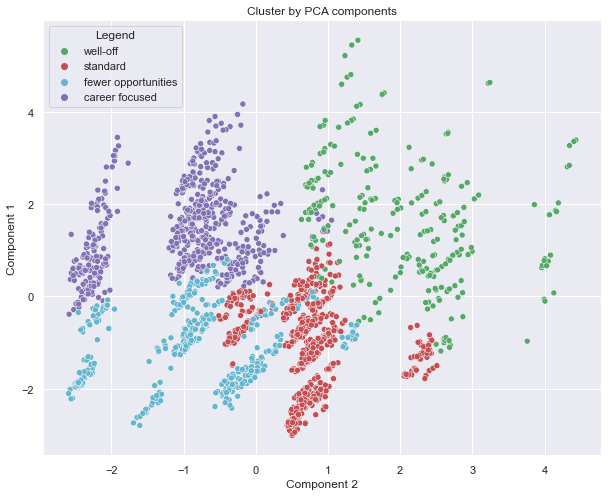

In [49]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Cluster by PCA components')
plt.show()

### The components are othogonal, this means that the difference between components is as big as possible.     

## **1.5) Data Export**

In [50]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [51]:
pickle.dump(pca,open('pca.pickle','wb'))

In [52]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

# **2) Purchase Analytics (Positioning).**

## **2.1) Dataset.**

### Each observation in the dataset is now a transaction, rather than a customer. 

### Several observations can relate to the same customer. 

### 500 unique individuals. We got purchase for every day for 2 years. 

### We know all the items they purchase. Here we have the data of chocolate purchase. 


### **Libraries**.

In [53]:

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


sns.set()

## **2.2) Exploratory Data Analysis.**

In [54]:
df_purchase = pd.read_csv('purchase data.csv')

In [55]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [56]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [57]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

## **2.3) Data segmentation.**

In [58]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [59]:
pca = pickle.load(open('pca.pickle','rb'))

In [60]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

### **2.3.1) Standardization.**

In [61]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

In [62]:
df_purchase_segm_std

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]])

### **2.3.2) PCA.**

In [63]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### PCA transformations for every transaction using the 3 principal components. 

In [64]:
df_purchase_segm_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

### **2.3.3) K-means PCA.**



### Determine the clusters for the PCA scores. 

In [65]:
purchase_segm_kmeans_pca= kmeans_pca.predict(df_purchase_segm_pca)

In [66]:
purchase_segm_kmeans_pca

array([2, 2, 2, ..., 2, 2, 2])

In [67]:
df_purchase_predictors = df_purchase.copy()

In [68]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


## **2.4) Descriptive Analysis by Segments.**

### **2.4.1) Data Analysis by customer.**

#### First we group our data by individuals and then by segments. 

#### We need to create a new dataframe with one record per individual to count how many times each customer enter the store. 

In [69]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index= False).count()

#### We got the number of purchase occasions per customer. 

In [70]:
temp1

,ID,Incidence
0,200000001,101
1,200000002,87
2,200000003,97
3,200000004,85
4,200000005,111
...,...,...
495,200000496,120
496,200000497,120
497,200000498,131
498,200000499,106


In [71]:
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


#### Now we are interested in the number of times a customer bought a product for the category of interest. 

In [72]:
temp2= df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index= False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp2.head()

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [73]:
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


#### We now calculate the average purchase frequency per individual. Thats the number of times a customer visited the store divided by the total number of visits by that individual. 

In [74]:
temp3['Average_N_Purchases'] = temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


#### Now we need the segment that the customer is part of. 

In [75]:
customer_1 = df_purchase_predictors['ID'] == 200000001
df_purchase_predictors.loc[customer_1,'Segment'].value_counts()


2    101
Name: Segment, dtype: int64

In [76]:
temp4= df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index= False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr =  temp3.join(temp4) 
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### **2.4.2) Segment Proportions.**

#### We calculate the number of purchases by each segment. 

In [77]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count() /df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

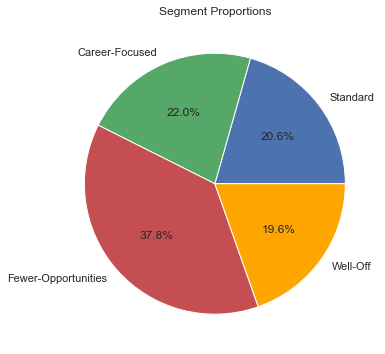

In [78]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused','Fewer-Opportunities','Well-Off'],
        autopct='%1.1f%%',
        colors = ('b','g','r','orange'))
plt.title('Segment Proportions')

### **2.4.3) Purchase Occasion and Purchase Incidence.**

#### Now we will find a quantitative measure to describe the purchase behaivours by segments.

#### How often people from different segments visit the store?

#### How often they buy chocolate candy bars?

#### How often did they buy relative to their store visits?

### To answer this questions we need to calculate the mean and standard deviation by segments. 

#### The mean shows the average behavior of each segment and the standard deviation shows how homonogeous each segment is. 

In [79]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [80]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


#### How often people from different segments visit the store?

Text(0.5, 1.0, 'Average Number of visits by segment')

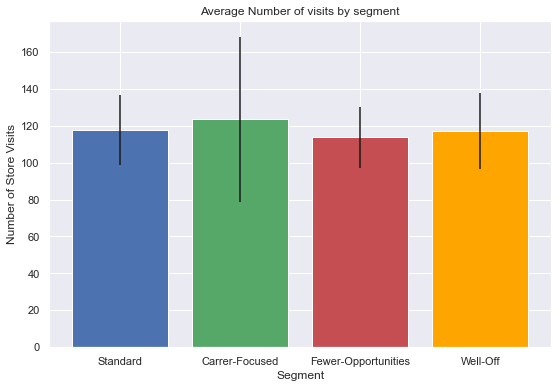

In [81]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard','Carrer-Focused','Fewer-Opportunities','Well-Off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'], # y-error
        color = ('b','g','r','orange')) 

plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of visits by segment')



#### The carrer focused customer are least homogeneous. This means that they are least alike when it comes to visit the store. 

#### How often a customer buys a product by segment?

Text(0.5, 1.0, 'Number of purchase incidences by segment')

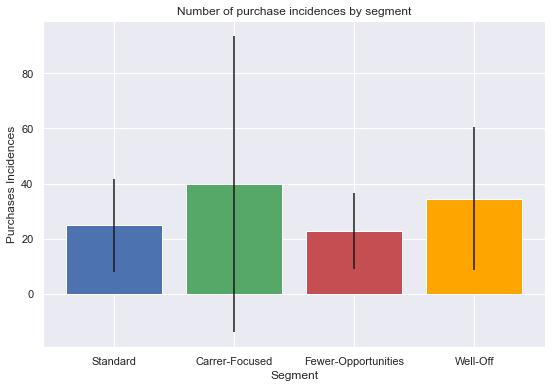

In [82]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard','Carrer-Focused','Fewer-Opportunities','Well-Off'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'], # y-error
        color = ('b','g','r','orange')) 

plt.xlabel('Segment')
plt.ylabel('Purchases Incidences')
plt.title('Number of purchase incidences by segment')



#### Carrer focused segment buys products more often, but their standard deviation is the highest. It can be that part of the segment buys products frequently and another part less so.

### **Brand Choice.**

In [83]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [84]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix = 'Brand', prefix_sep='_' )
brand_dummies['Segment'] , brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']

In [85]:
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [86]:
temp = brand_dummies.groupby(['ID'],as_index=True).mean()

In [87]:
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,0


In [88]:
mean_brand_choice = temp.groupby(['Segment'],as_index=True).mean()

In [89]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.251186,0.396502,0.156481,0.059474,0.136357
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.137567,0.681190,0.020923,0.061548,0.098772
3,0.041928,0.117422,0.030610,0.613623,0.196417


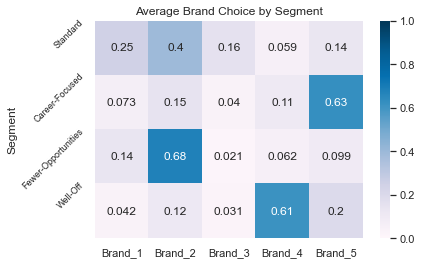

In [90]:
sns.heatmap(mean_brand_choice,vmin=0,vmax=1,cmap = 'PuBu', annot = True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','Fewer-Opportunities','Well-Off'],rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()


#### Brand 1 is the cheapest one and brand 5 the most expensive. 

#### Carrer focused customer buys the most expensive chocolate bar, maybe they are looking for some kind of status. This can raise the price of this brand. 

#### Maybe we can try to influence the standard customers to try out different brands. 

### **Revenue.**

#### We are going to calculate the revenue of each brand by segment. 

#### For brand 1:

In [91]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] *temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [92]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [93]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [94]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [95]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] *temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### Revenue is calculated as units sold * price. 

#### Now lets calculate the total revenue by segment. 

In [96]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+segments_brand_revenue['Revenue Brand 2']+ segments_brand_revenue['Revenue Brand 3']+ segments_brand_revenue['Revenue Brand 4']+segments_brand_revenue['Revenue Brand 5'])

In [97]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [98]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']

In [99]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [100]:
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',1:'Career-Focused',2:'Fewer-Opportunities',3:'Well-Off'})

In [101]:
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])

In [102]:
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


#### Carrer focused segment is the one that provides the biggest revenue for the store. 

#### Brand 3 has the lowest revenue. 

#### Brand 4 is purchase more by the Well-Off segment. This segment seems to be not affected by prices and Brand 4 can retain its customers better than the other ones. 

# **3) Predictive Analytics.**

## **3.1) Modeling Purchase Incidence.**

### **Data Preparation.**

In [103]:
df_purchase = pd.read_csv('purchase data.csv')

scaler = pickle.load(open('scaler.pickle','rb'))

pca = pickle.load(open('pca.pickle','rb'))

kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

purchase_segm_kmeans_pca= kmeans_pca.predict(df_purchase_segm_pca)


df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')


df_purchase_predictors = pd.concat([df_purchase_predictors,segment_dummies],axis=1)


# Predictive analytics dataframe. 
df_pa = df_purchase_predictors 


### Choose dependant and independant variables.

#### The dependant variable is wheter a purchase is taking place or not. This information is contained in the Incidence variable. 

#### Price is the most prominent feature. 

In [104]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [105]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


In [106]:
Y = df_pa['Incidence']

In [107]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1']+ df_pa['Price_2']+ df_pa['Price_3']+ df_pa['Price_4']+ df_pa['Price_5'])/5

In [108]:
X


,Mean_Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


#### We make the variable mean price without taking in count the brand. This is because we are going to model the purchase probability, so we do not need to taking in count the different brands of chocolates, only we are going to taking in count if a purchase was made or not. 

In [109]:
model_purchase = LogisticRegression(solver = 'sag') # technique for iteration optimization problem. 
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [110]:
model_purchase.coef_

array([[-2.34878829]])

#### This coeficient is the one for the independent variables which in our case is the mean price. So when the price goes down, the probability of purchase is greater. 

## **3.2) Price Elasticity of Purchase Probability.**

### Price elasticity of purchase probability can be represented as % change in purchase probability in response to a 1% change in price. 

In [111]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


### The minimum price is 1.1 and the largest is 2.8

In [112]:
price_range = np.arange(0.5,3.5,0.01)

In [113]:
df_price_range = pd.DataFrame(price_range)

In [114]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [115]:
Y_pr

array([[0.08209207, 0.91790793],
       [0.08387942, 0.91612058],
       [0.08570204, 0.91429796],
       [0.08756049, 0.91243951],
       [0.08945529, 0.91054471],
       [0.09138699, 0.90861301],
       [0.09335612, 0.90664388],
       [0.09536323, 0.90463677],
       [0.09740886, 0.90259114],
       [0.09949354, 0.90050646],
       [0.10161781, 0.89838219],
       [0.10378221, 0.89621779],
       [0.10598727, 0.89401273],
       [0.10823353, 0.89176647],
       [0.1105215 , 0.8894785 ],
       [0.11285172, 0.88714828],
       [0.11522471, 0.88477529],
       [0.11764098, 0.88235902],
       [0.12010104, 0.87989896],
       [0.12260539, 0.87739461],
       [0.12515454, 0.87484546],
       [0.12774897, 0.87225103],
       [0.13038917, 0.86961083],
       [0.13307561, 0.86692439],
       [0.13580875, 0.86419125],
       [0.13858906, 0.86141094],
       [0.14141697, 0.85858303],
       [0.14429291, 0.85570709],
       [0.14721732, 0.85278268],
       [0.15019059, 0.84980941],
       [0.

### The first value indicates the probability of no purchase and the second one the probability of purchase. 

In [116]:
purchase_pr = Y_pr[:][:,1]

In [117]:
purchase_pr

array([0.91790793, 0.91612058, 0.91429796, 0.91243951, 0.91054471,
       0.90861301, 0.90664388, 0.90463677, 0.90259114, 0.90050646,
       0.89838219, 0.89621779, 0.89401273, 0.89176647, 0.8894785 ,
       0.88714828, 0.88477529, 0.88235902, 0.87989896, 0.87739461,
       0.87484546, 0.87225103, 0.86961083, 0.86692439, 0.86419125,
       0.86141094, 0.85858303, 0.85570709, 0.85278268, 0.84980941,
       0.84678688, 0.8437147 , 0.84059252, 0.83741999, 0.83419677,
       0.83092255, 0.82759704, 0.82421995, 0.82079104, 0.81731007,
       0.81377682, 0.81019111, 0.80655276, 0.80286165, 0.79911765,
       0.79532067, 0.79147065, 0.78756755, 0.78361138, 0.77960214,
       0.7755399 , 0.77142474, 0.76725677, 0.76303615, 0.75876306,
       0.75443771, 0.75006035, 0.74563127, 0.74115079, 0.73661927,
       0.7320371 , 0.72740471, 0.72272257, 0.71799119, 0.71321111,
       0.70838292, 0.70350723, 0.69858472, 0.69361606, 0.68860202,
       0.68354335, 0.67844088, 0.67329546, 0.66810799, 0.66287

### How does demand on the product change when the price change?

### Price elasticity.

In [118]:
pe = model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [119]:
df_price_elasticities = pd.DataFrame(price_range)

In [120]:
df_price_elasticities = df_price_elasticities.rename(columns={0:'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096408
1,0.51,-0.100478
2,0.52,-0.104674
3,0.53,-0.109000
4,0.54,-0.113460
...,...,...
295,3.45,-8.015571
296,3.46,-8.040826
297,3.47,-8.066047
298,3.48,-8.091233


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

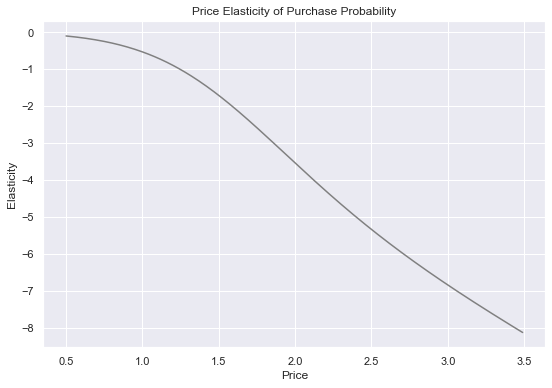

In [121]:
plt.figure(figsize = (9,6))
plt.plot(price_range,pe,color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## **Important insights about the graph**.

### As a function, the price elasticity decreases as price increases. 

### The rate of decrease is slow between 0.5 and 1.1 and then in goes down really fast beyond 1.1. 

### If the percent change in purchase probability given a percent change in price is greater than 100% we said that the purchase probability is elastic.  So if the elasticity has a value less than 1 in absolute terms we say it is inelastic.


### For the price 1.1 the Mean_PE is -0.691917. This means that for each increase in price by 1% the probability of purchase will change by -0.691917%.  


### An increase in 1% in elasticity at 1.1 leads to a decrease to less than 1%. Purchase probability at this point is inelastic.


### For a price of 1.5 the Mean_PE is -1.70. Here an increase in 1% in price will translate into a decline  -1,70% of purchase probability. Therefore at 1.5 of price  an increase in 1%  will lead to a decrease of almost  2% in purchase probability. Here the purchase probability is elastic. 

### So the general recommendation is to increase prices for inelastic values like the 1.1 price point which as as MEAN_PE of -0.69%. 

### For elastic prices we decrease the prices. 

### The point at which the price transform from inelastic to elastic is 1.25. 

### **Purchase Probability by Segments**. 

### **Segment 1- Carrer-Focused**

In [122]:
df_pa_segment_1 = df_pa[df_pa['Segment']==1]

In [123]:
Y = df_pa_segment_1['Incidence']

In [124]:
X = pd.DataFrame()

In [125]:
X['Mean_Price'] = (df_pa_segment_1['Price_1']+ df_pa_segment_1['Price_2']+ df_pa_segment_1['Price_3']+ df_pa_segment_1['Price_4']+ df_pa_segment_1['Price_5'])/5

In [126]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X,Y)


LogisticRegression(solver='sag')

In [127]:
model_incidence_segment_1.coef_

array([[-1.71173036]])

In [128]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:,1]
pe_segment_1 = model_incidence_segment_1.coef_[:,0]*price_range*(1-purchase_pr_segment_1)

### **Results**

In [129]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096408,-0.119095
1,0.51,-0.100478,-0.123278
2,0.52,-0.104674,-0.127554
3,0.53,-0.109000,-0.131925
4,0.54,-0.113460,-0.136393
...,...,...,...
295,3.45,-8.015571,-5.680158
296,3.46,-8.040826,-5.700313
297,3.47,-8.066047,-5.720432
298,3.48,-8.091233,-5.740514


In [130]:
break_point = df_price_elasticities[df_price_elasticities['PE_Segment_1'] <-1]

In [131]:
break_point

,Price_Point,Mean_PE,PE_Segment_1
89,1.39,-1.370379,-1.013163
90,1.40,-1.399084,-1.030493
91,1.41,-1.428125,-1.047992
92,1.42,-1.457497,-1.065657
93,1.43,-1.487199,-1.083488
...,...,...,...
295,3.45,-8.015571,-5.680158
296,3.46,-8.040826,-5.700313
297,3.47,-8.066047,-5.720432
298,3.48,-8.091233,-5.740514


In [132]:
break_point.iloc[0,:]

Price_Point     1.390000
Mean_PE        -1.370379
PE_Segment_1   -1.013163
Name: 89, dtype: float64

In [133]:
bp = df_price_elasticities[df_price_elasticities['PE_Segment_1'].between(-1.1,-1)]
bp.iloc[0,:]


Price_Point     1.390000
Mean_PE        -1.370379
PE_Segment_1   -1.013163
Name: 89, dtype: float64

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

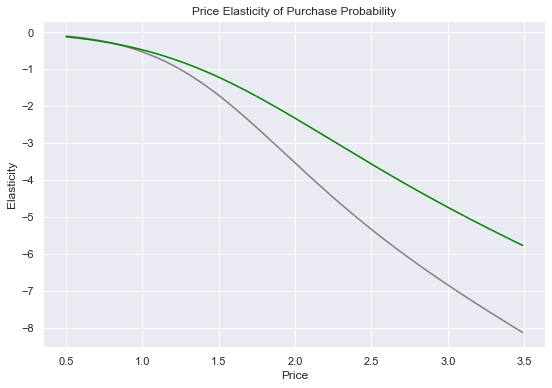

In [134]:
plt.figure(figsize = (9,6))
plt.plot(price_range,pe,color = 'grey')
plt.plot(price_range,pe_segment_1,color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### For the carrer focus segment we can increase prices up to the 1.39 point and decrease for the prices above that point. 

### **Purchase probability with promotions.**

In [135]:
Y = df_pa['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1']+df_pa['Price_2']+df_pa['Price_3']+df_pa['Price_4']+df_pa['Price_5'])/5

X['Mean_Promotion'] = (df_pa['Promotion_1']+df_pa['Promotion_2']+df_pa['Promotion_3']+df_pa['Promotion_4']+df_pa['Promotion_5'])/5

In [136]:
X.columns.values

array(['Mean_Price', 'Mean_Promotion'], dtype=object)

In [137]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49421146,  0.56154324]])

### The promotion coefficient is positive. 

### **Price Elasticity with promotion**

In [138]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns={0:'Price_Range'})


In [139]:
df_price_elasticity_promotion['Promotion'] = 1

In [140]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [141]:
promo = Y_promotion[:,1]
price_elasticity_promo = (model_incidence_promotion.coef_[:,0]*price_range)*(1-promo)

In [142]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,Elasticity_Promotion_1
0,0.50,-0.096408,-0.119095,-0.125763
1,0.51,-0.100478,-0.123278,-0.129880
2,0.52,-0.104674,-0.127554,-0.134076
3,0.53,-0.109000,-0.131925,-0.138352
4,0.54,-0.113460,-0.136393,-0.142709
...,...,...,...,...
295,3.45,-8.015571,-5.680158,-4.862415
296,3.46,-8.040826,-5.700313,-4.880618
297,3.47,-8.066047,-5.720432,-4.898790
298,3.48,-8.091233,-5.740514,-4.916932


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

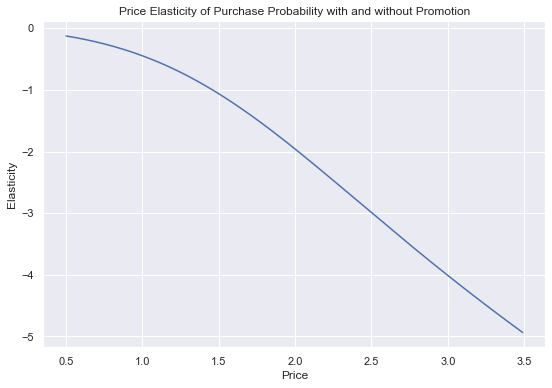

In [143]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

### This is the elasticity given max and min promotional activities. 

### The elasticity curve with promotion sits above its no promotion counterpart for the entire price range.

### People are more willing when there are promotions

### Customers are less price sensitive to price changes when there are promotion activities. It pays off to offer discounts. 

### It would be more beneficial to have a higher price and constant promotion than a constant lower price.  

## **3.3) Modeling Brand Choice.**

#### We are going to answer the question, which brand is the customer going to choose. 


#### In the dataset, refering to the brand feature, 0 states for no purchase in that visit, and the different brands are denoted with number from 1 to 5. 

#### What is the probability of purchasing each brand. This can be done using logistic regression, with the multinomial logistic regression. 

### Data preparation. 

In [145]:
brand_choice = df_pa[df_pa['Incidence']==1]

In [146]:
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


#### We will predict the brand choice based on its price. 

In [147]:
Y = brand_choice['Brand']

features = ['Price_1','Price_2','Price_3','Price_4','Price_5']
X = brand_choice[features]

In [148]:
model_brand_choice = LogisticRegression(solver='sag',multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [149]:
model_brand_choice.coef_

array([[-3.91594064,  0.65846753,  2.41778203,  0.70409822, -0.20208831],
       [ 1.27462087, -1.8798517 , -0.21261358, -0.20633474,  0.58788059],
       [ 1.62414257,  0.56208809,  0.50071955,  1.03947567,  0.45273573],
       [ 0.57454837,  0.39559333, -1.40056777, -1.24623789,  0.24936201],
       [ 0.44262883,  0.26370275, -1.30532023, -0.29100125, -1.08789001]])

In [150]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915941,0.658468,2.417782,0.704098,-0.202088
1,1.274621,-1.879852,-0.212614,-0.206335,0.587881
2,1.624143,0.562088,0.500720,1.039476,0.452736
3,0.574548,0.395593,-1.400568,-1.246238,0.249362
4,0.442629,0.263703,-1.305320,-0.291001,-1.087890


In [151]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1','Price_2','Price_3','Price_4','Price_5' ]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


#### For brand 1 the price coeficient is negative, we know the higher the price, the lower the probability of purchase. 

#### If the price of the competition is higher than mine, there is a high probability that a customer prefers to buy my product. 

### **Own Price Elasticity Brand 5**

#### Now we are going to predict purchase probability of brand 5 based on changes in its own price. 

In [152]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] =  brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] =  brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] =  brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] =  brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] =  price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [153]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [157]:
predict_brand_5

array([[0.03290636, 0.02177643, 0.00543891, 0.02988793, 0.90999037],
       [0.03316109, 0.02211905, 0.00551702, 0.03025557, 0.90894728],
       [0.03341731, 0.02246673, 0.00559617, 0.03062729, 0.90789249],
       ...,
       [0.06881539, 0.47570464, 0.07953264, 0.23889481, 0.13705253],
       [0.06852978, 0.47748747, 0.07972289, 0.23897977, 0.13528008],
       [0.06824323, 0.47926199, 0.07991111, 0.23905729, 0.13352638]])

In [154]:
pr_own_brand_5 = predict_brand_5[:][:,4]

#### Now lets calculate the Elasticity. 

#### The price coefficient of brand 5 is the most right-down cell in the bc_coef table. (-1.09)

In [155]:
beta5 = bc_coef.iloc[4,4]
beta5

-1.09

In [162]:
own_price_elasticity_brand_5 = beta5*price_range*(1- pr_own_brand_5)

In [163]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,Elasticity_Promotion_1,Brand_5
0,0.50,-0.096408,-0.119095,-0.125763,-0.049055
1,0.51,-0.100478,-0.123278,-0.129880,-0.050616
2,0.52,-0.104674,-0.127554,-0.134076,-0.052207
3,0.53,-0.109000,-0.131925,-0.138352,-0.053827
4,0.54,-0.113460,-0.136393,-0.142709,-0.055477
...,...,...,...,...,...
295,3.45,-8.015571,-5.680158,-4.862415,-3.231571
296,3.46,-8.040826,-5.700313,-4.880618,-3.247764
297,3.47,-8.066047,-5.720432,-4.898790,-3.263926
298,3.48,-8.091233,-5.740514,-4.916932,-3.280056


Text(0.5, 1.0, 'Own price elasticity of purchase probability for Brand 5')

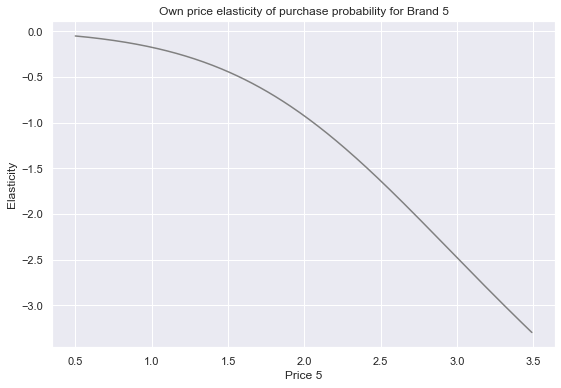

In [164]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own price elasticity of purchase probability for Brand 5')

### **Cross Price Elasticity Brand 5, Cross Brand 4.**

#### Cross price elasticity measures the purchase probability for our own brand, in this case brand 5, based on changes in prices of the competitor. 

#### So we need to examine changes in the price of brand 4. 

#### The other brand prices can remain constant and we use the mean for that. 

In [165]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] =  brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] =  brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] =  brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] =  price_range
df_brand5_cross_brand4['Price_5'] =  brand_choice['Price_5'].mean()
df_brand5_cross_brand4

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,3.45,2.654296
296,1.384559,1.764717,2.006694,3.46,2.654296
297,1.384559,1.764717,2.006694,3.47,2.654296
298,1.384559,1.764717,2.006694,3.48,2.654296


In [166]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

### For the cross price elasticity model, the elasticity formula changes.

#### E = -beta(own price)* price_range(cross brand) * Pr(cross brand)

#### Pr : probability of choosing the alternative brand, in this case the brand 4. 

#### Here we obtain the probability of choosing the brand 4. It has an index 3 in the predict_brand5_cross_brand4 array. 

In [167]:
pr_brand_4 = predict_brand5_cross_brand4[:][:,3]

In [168]:
brand5_cross_brand4_price_elasticity = -beta5 *price_range *pr_brand_4

In [169]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity

Text(0.5, 1.0, 'Cross price elasticity of brand 5 with respect to Brand 4')

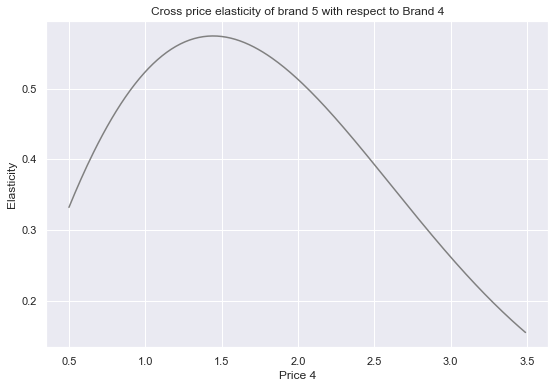

In [170]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross price elasticity of brand 5 with respect to Brand 4')

#### We observed that the elasticities are positive across the price range. This indicates that if competitor, brand 4, increase prices, the purchase probability for our own brand will increase. 

#### If E(cross brand) > 0 : substitute. If the price elasticity of the cross brand is greater than 0 it can be consider a sustitute. This makes sense in our example because all the 5 brand are for chocolate bars. They are all the same product category. Instead, if we have two different products like chocolater bars and beers, the beers will not substitute the chocolate bars. 

#### If |E(cross brand)|> |E(own brand|, the cross brand, in this case the brand 4, is consider as an strong substitute. 

#### So, is brand 4 a strong substitute for brand 5? It depends on the price point. We can examine the elasticities table instead. 

#### Brand 4 is a strong substitute for all prices up to 1.65. But we known that is prices are out of the domain of brand 4. So if brand 4 has a lower price it will be a very strong competitor for brand 5. The price range of brand 4 lies between 1.76 and 2.26.


#### In this region (1.76 , 2.26) we see that the elasticity stedely  decreasing.  This signals that with an increase in price,the purchase probability changes more slowly. So our purchase probability for brand 5 still increases with the increase in price of brand 4 but at a slower rate.   


#### We can create a strategy to target customers which choose brand 4 and attract them to buy the own brand. 

#### But this is not ideal, because targeting the average customer is a laboursome task or next to impossible. None brand can make every customer happy, but  we can make some  customer segments happy. 

#### It is easier to target customer segments than all of them. 

### **Own and Cross-Price Elasticity by Segment.**

### Well-Off is a strong segment for brand 4. 

In [174]:
brand_choice_s3 = df_pa[df_pa['Incidence']==1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment']==3]
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1
